In [1]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_auc_score
from sklearn import preprocessing

raw_data = pd.read_csv('housing_smaller.csv')

In [2]:
#Subset Creation to prep data for Independent vs Dependent variables.
SELECTED_FIELDS = [
    'id',
    'sqfeet',
    'beds',
    'baths',
    'electric_vehicle_charge',
    'parking_options',
    'price',
    'dogs_allowed'
]

SELECTED_FLOATS = [
    'sqfeet',
    'beds',
    'baths',
    'price',
]

ID_FIELD = 'id' #Set tracking var
df = raw_data[SELECTED_FIELDS].dropna() #drops Null values
df[ID_FIELD] = df[ID_FIELD].astype('string') #Set ID as string
df[SELECTED_FLOATS] = df[SELECTED_FLOATS].astype(float)

df.head() # first 5 properties

,id,sqfeet,beds,baths,electric_vehicle_charge,parking_options,price,dogs_allowed
0,7049044568,1078.0,3.0,2.0,0,carport,1148.0,1
1,7049047186,1001.0,2.0,2.0,0,carport,1200.0,0
2,7043634882,1683.0,2.0,2.0,0,attached garage,1813.0,1
3,7049045324,708.0,1.0,1.0,0,carport,1095.0,1
6,7049020738,661.0,1.0,1.0,0,off-street parking,935.0,1


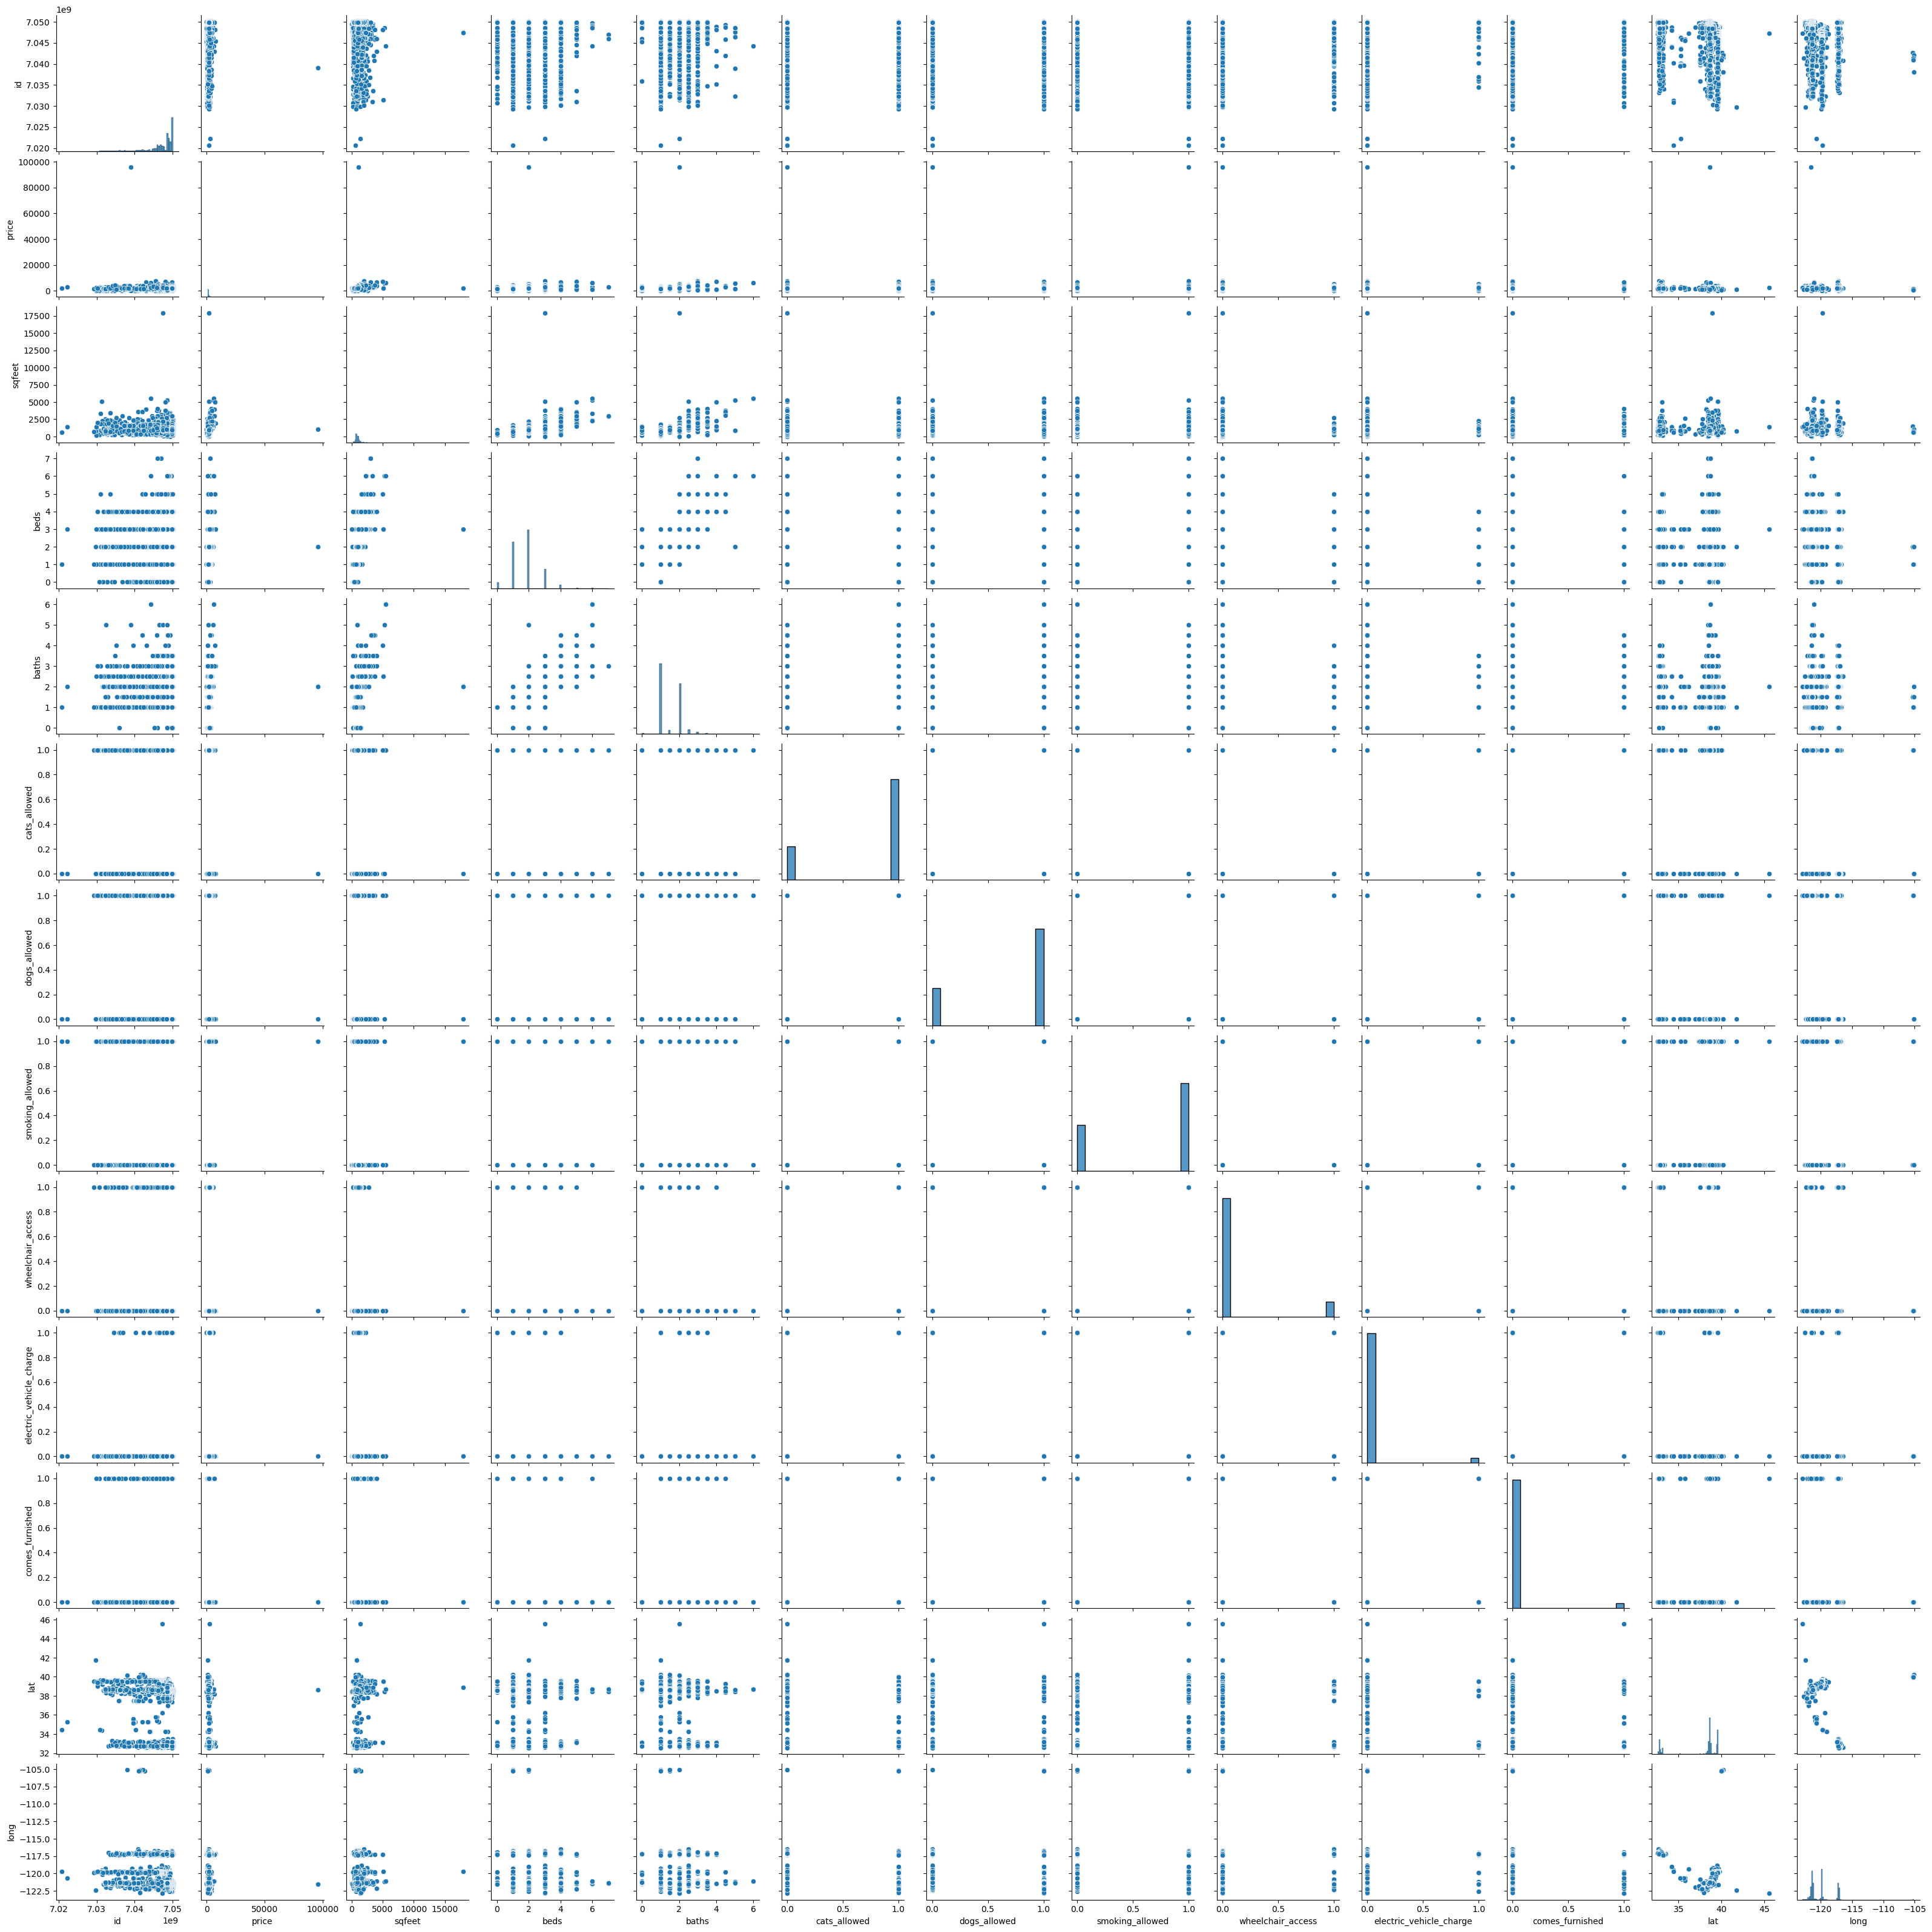

In [3]:
# 
# ASSIGN VARIABLE TYPES
# 
# This step assigns variable types. OUTCOME_VAR identifies the dependent variable.
# Other arrays identify independent variables by type: categorical, numerical, or boolean. 
# 
OUTCOME_VAR = 'dogs_allowed' 
CATEGORICAL_VARS = ['parking_options','id'] 
NUMERICAL_VARS = ['sqfeet', 'beds', 'baths', 'price'] 

sns.pairplot(raw_data)

In [4]:
#Data Update Stage

#FILL_WITH_ZEROES = [
#]
#for col in FILL_WITH_ZEROES:
 #   df[col] = df[col].fillna(0)
#
#FILL_WITH_MEDIANS = [
#]
#for col in FILL_WITH_MEDIANS:
 #   df[col] = df[col].fillna(df[col].median())

#FILL_WITH_UNKNOWNS = [
#]
#for col in FILL_WITH_UNKNOWNS:
    #df[col] = df[col].fillna('Unknown')

In [5]:
# creating feature variables
X = df.drop(CATEGORICAL_VARS, axis = 1)
y = df[OUTCOME_VAR]
print(X)
print(y)


      sqfeet  beds  baths  electric_vehicle_charge   price  dogs_allowed
0     1078.0   3.0    2.0                        0  1148.0             1
1     1001.0   2.0    2.0                        0  1200.0             0
2     1683.0   2.0    2.0                        0  1813.0             1
3      708.0   1.0    1.0                        0  1095.0             1
6      661.0   1.0    1.0                        0   935.0             1
...      ...   ...    ...                      ...     ...           ...
4701   426.0   1.0    1.0                        0  1985.0             1
4702  1110.0   2.0    2.0                        1  2650.0             0
4705   729.0   1.0    1.0                        0  1600.0             1
4706   835.0   2.0    2.0                        0  1750.0             0
4707   970.0   2.0    1.5                        0  1845.0             1

[3671 rows x 6 columns]
0       1
1       0
2       1
3       1
6       1
       ..
4701    1
4702    0
4705    1
4706    0

In [6]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=None,train_size=None )
print("Dependent_Train: \n{}".format(X_train))
print("Dependent_Test: \n{}".format(X_test))
print("Independent_Train: \n{}".format(y_train))
print("Independent_Test: \n{}".format(y_test))


Dependent_Train: 
      sqfeet  beds  baths  electric_vehicle_charge   price  dogs_allowed
2550   860.0   1.0    1.0                        0  2121.0             1
3982   807.0   1.0    1.0                        0  2590.0             1
3986   902.0   2.0    2.0                        0  2880.0             1
952    840.0   2.0    1.0                        0  1099.0             1
1900  1292.0   3.0    2.0                        0  1509.0             1
...      ...   ...    ...                      ...     ...           ...
856    850.0   2.0    1.5                        0  2000.0             1
2208   907.0   3.0    1.0                        0  1750.0             0
1659  1125.0   2.0    1.5                        0  1265.0             0
338   2413.0   3.0    2.5                        0  1890.0             1
4300   778.0   1.0    1.0                        0  2305.0             1

[2753 rows x 6 columns]
Dependent_Test: 
      sqfeet  beds  baths  electric_vehicle_charge   price  dogs

In [7]:
# creating a regression model
model = LinearRegression()

# fitting the model
model.fit(X_train,y_train)

# making predictions
predictions = model.predict(X_test)

y_pred_binary = np.where(predictions >= 0.5, 1, 0)

# Compute evaluation metrics
f1 = f1_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)
auc = roc_auc_score(y_test, predictions)

# Print the scores
print("F1 Score:", f1)
print("Precision Score:", precision)
print("Accuracy Score:", accuracy)
print("Area Under the Curve (AUC) Score:", auc)
#print(predictions)

F1 Score: 1.0
Precision Score: 1.0
Accuracy Score: 1.0
Area Under the Curve (AUC) Score: 1.0


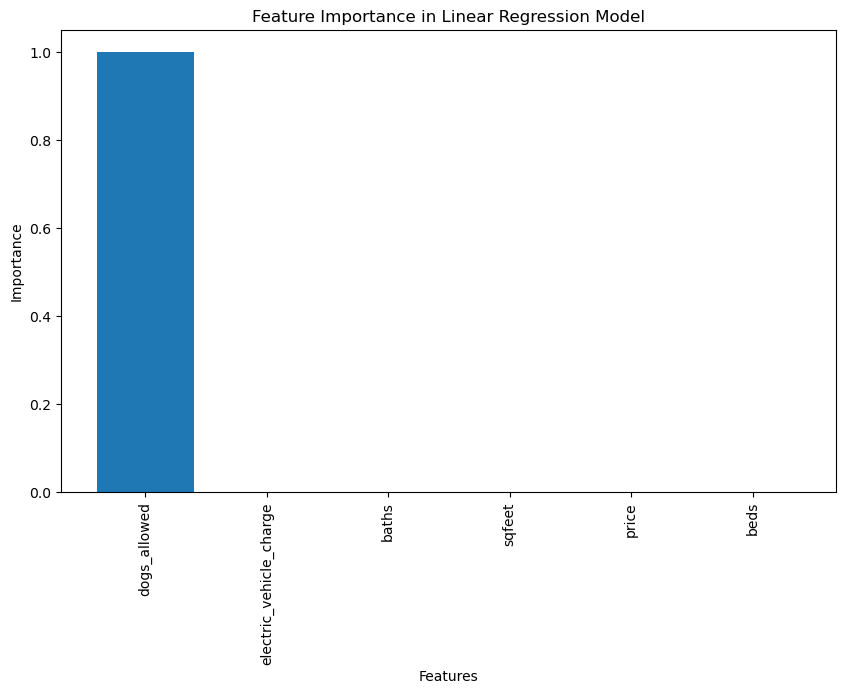

In [8]:
# Get feature importance (coefficients) and feature names
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})

# Sort the features by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Linear Regression Model')
plt.xticks(rotation=90)
plt.show()

In [9]:
# model evaluation
print(predictions)
print(y_test)
print(
'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
'mean_absolute_error : ', mean_absolute_error(y_test, predictions))


[ 1.00000000e+00  1.40399520e-16  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  6.46499487e-17  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.20508712e-16  1.00000000e+00
  1.97893278e-16  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  8.83337131e-17  1.00000000e+00
 -4.41267219e-17 -2.41808363e-17  1.00000000e+00  1.00000000e+00
  1.00000000e+00  9.26255735e-17  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.03757586e-16
 -5.07409133e-17 -1.20663790e-17  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00 -2.41808363e-17
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.32783298e-16  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.12590084e-16  2.67528772e-17  1.00000000e+00
  1.00000000e+00  1.00000

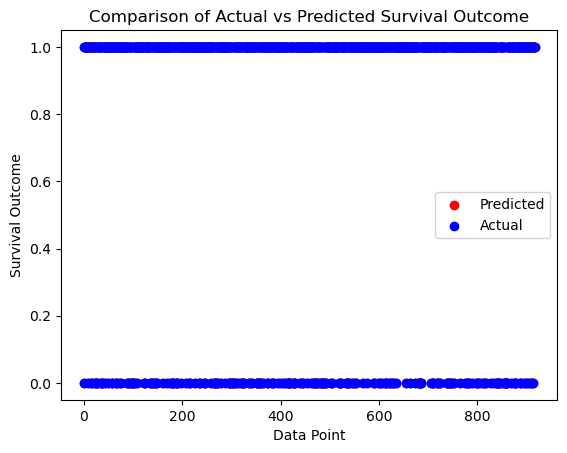

In [10]:
# Plotting the predicted values
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted')

# Plotting the actual values
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')

# Adding labels and title
plt.xlabel('Data Point')
plt.ylabel('Survival Outcome')
plt.title('Comparison of Actual vs Predicted Survival Outcome')

# Adding a legend
plt.legend()

# Display the plot
plt.show()




In [11]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model using the treatment variable as the dependent variable and covariates as independent variables
logistic_model.fit(X_test, y_test)

C:\Users\BaxterRomero\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
propensity_scores = logistic_model.predict_proba(X)[:, 1]
df['propensity_score'] = propensity_scores

df_copy = df.drop(SELECTED_FIELDS,axis = 1)
df_copy.head()

,propensity_score
0,0.989256
1,0.031948
2,0.980706
3,0.989034
6,0.989003


In [13]:
bins = pd.cut(df_copy['propensity_score'], bins=6, labels=['Group F', 'Group E', 'Group D', 'Group C', 'Group B', 'Group A'])

# Add the bin labels as a new column in the DataFrame
df_copy['group'] = bins

# Group the data based on the 'group' column and perform desired aggregation
grouped_data = df_copy.groupby('group').agg({'propensity_score': 'mean'})

# Print the aggregated data
print(grouped_data)


         propensity_score
group                    
Group F          0.040149
Group E               NaN
Group D               NaN
Group C               NaN
Group B          0.813702
Group A          0.989273


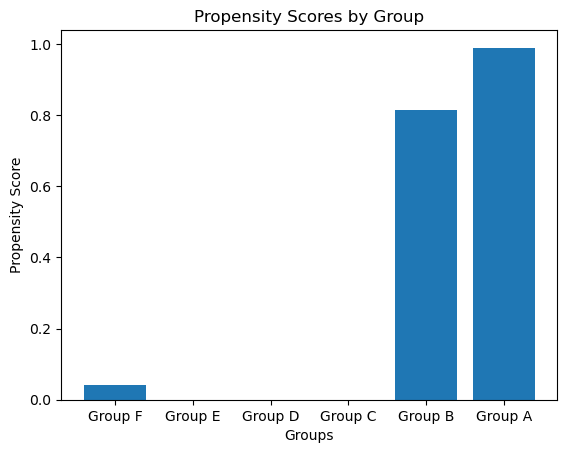

In [14]:

# Extracting the group labels and propensity scores from the 'grouped_data' DataFrame
group_labels = grouped_data.index
propensity_scores = grouped_data['propensity_score']

# Plotting the bar chart
plt.bar(group_labels, propensity_scores)

# Adding labels and title
plt.xlabel('Groups')
plt.ylabel('Propensity Score')
plt.title('Propensity Scores by Group')

# Display the chart
plt.show()